In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

### See lots in Probe server

In [ ]:
os.listdir(### LOCAL SERVER ADDRESS ###)

### Download .sas7bdat probe file from server

In [12]:
def filepath_generate(probe_folder, lot, extension):
    return probe_folder+lot+extension

probe_folder = ### LOCAL SERVER ADDRESS ###

lot = 'x460600'

extension = '.sas7bdat'

reason = 'F1CURE03 Splits'

filepath = filepath_generate(probe_folder, lot, extension)

df = pd.read_sas(filepath)

# Change WAFER from float to int
df = df.astype({'WAFER': 'int32'})

df.head()

### NOT ACTUAL DATA - AMENDED FOR PUBLIC SHARING ###

,seq,x,y,KEL1,IGES_5V1,ICES_10V1,VTH_250UA1,VTH_1MA1,VTH_3MA1,VCEON_10A1,...,VTH_RATIO12,date,time,bin,program,WAFER,lotid,fet,head,f_name
0,1.0,8.0,21.0,0.110072,1.915410e-08,5.000000e-10,5.4203,5.6667,5.8532,1.0906,...,1.0823,2021-05-13,63877.0,b' 1',b'PRD_FIR_D1_R30_1',25,b'X460600.1',b'ETS1',b'1',b'PRD_FIR_X460600.1_25_ETS1_H1_NOMATCH_P1_2349...
1,1.0,9.0,21.0,0.109942,1.841880e-08,-1.300000e-09,5.1113,5.4192,5.6697,1.0364,...,NaN,2021-05-13,63877.0,b' 7',b'PRD_FIR_D1_R30_1',25,b'X460600.1',b'ETS1',b'1',b'PRD_FIR_X460600.1_25_ETS1_H1_NOMATCH_P1_2349...
2,1.0,10.0,22.0,0.110137,1.885310e-08,1.000000e-09,5.1320,5.4281,5.6813,1.0256,...,1.1024,2021-05-13,63877.0,b' 1',b'PRD_FIR_D1_R30_1',25,b'X460600.1',b'ETS1',b'1',b'PRD_FIR_X460600.1_25_ETS1_H1_NOMATCH_P1_2349...
3,2.0,10.0,21.0,0.110267,2.728500e-09,1.190000e-08,5.2857,5.5545,5.7681,0.9964,...,1.0946,2021-05-13,63877.0,b' 1',b'PRD_FIR_D1_R30_1',25,b'X460600.1',b'ETS1',b'1',b'PRD_FIR_X460600.1_25_ETS1_H1_NOMATCH_P1_2349...
4,1.0,11.0,23.0,0.110202,1.754030e-08,4.800000e-09,5.5474,5.7525,5.9179,1.0205,...,1.0659,2021-05-13,63877.0,b' 1',b'PRD_FIR_D1_R30_1',25,b'X460600.1',b'ETS1',b'1',b'PRD_FIR_X460600.1_25_ETS1_H1_NOMATCH_P1_2349...


#### Load from local csv (alternative) 

In [13]:
# Load from local csv alternative

#df = pd.read_csv(lot+'.csv')

### See dataframe columns

In [14]:
df.columns

Index(['seq', 'x', 'y', 'KEL1', 'IGES_5V1', 'ICES_10V1', 'VTH_250UA1',
       'VTH_1MA1', 'VTH_3MA1', 'VCEON_10A1', 'VCEON_25A1', 'BVCES_10UA1',
       'BVCES_25UA1', 'BVCES_50UA1', 'BVCES_100UA1', 'BVCES_250UA1',
       'BVCES_500UA1', 'BVCES_750UA1', 'BVCES_1MA1', 'BVCES_3MA1',
       'IGES_R33V1', 'IGES_42V1', 'ICES_600V1', 'IGES_5V2', 'ICES_1200V1',
       'IGES_5V3', 'ICES_1260V1', 'VTH_1MA2', 'VTH_10MA1', 'VTH_100UA1',
       'VTH_1MA3', 'IGES_33V1', 'IGES_R33V2', 'CLAMP_VOLTAGE1', 'CIL1',
       'CIL_I_PEAK1', 'ICES_1260V2', 'IGES_33V2', 'D_VTH1', 'VTH_RATIO11',
       'VTH_RATIO12', 'date', 'time', 'bin', 'program', 'WAFER', 'lotid',
       'fet', 'head', 'f_name'],
      dtype='object')

### Select parameters to analyze

In [15]:
general_columns = ['WAFER', 'seq', 'x', 'y']

parameters_of_interest = ['VCEON_10A1', 'VCEON_25A1']
#parameters_of_interest = ['VCEON1', 'VCEON2']

df_vceon = df [general_columns + parameters_of_interest]

#df_vceon['WAFER'].apply(lambda x: int(x))

df_vceon.head()

,WAFER,seq,x,y,VCEON_10A1,VCEON_25A1
0,25,1.0,8.0,21.0,1.0906,1.3617
1,25,1.0,9.0,21.0,1.0364,1.2861
2,25,1.0,10.0,22.0,1.0256,1.3119
3,25,2.0,10.0,21.0,0.9964,1.2384
4,25,1.0,11.0,23.0,1.0205,1.3313


### Two way split

In [16]:
def add_split_column(df, split_wafers, split_tool):

    split_column = [split_tool if x in split_wafers else 'CONTROL' for x in df['WAFER']]
    
    df['tool'] = split_column
    
    return df

#### Split conditions

In [17]:
split_performed = True

#x460601
#split_wafers = [23, 19, 16, 14, 13, 10, 21, 15, 6, 4, 3, 9]

#x460600
split_wafers = [19, 24, 20, 12, 9, 4, 3, 7, 10, 14, 17, 22]


split_tool = 'f1cure03'

#### Split dataframe

In [18]:
df_vceon = add_split_column(df_vceon, split_wafers, 'f1cure03')
df_vceon = df_vceon.astype({'tool': 'category'})

df_vceon

#df_vceon.groupby('WAFER').mean()
#df_vceon.head()


<ipython-input-16-96e8535f502b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tool'] = split_column


,WAFER,seq,x,y,VCEON_10A1,VCEON_25A1,tool
0,25,1.0,8.0,21.0,1.0906,1.3617,CONTROL
1,25,1.0,9.0,21.0,1.0364,1.2861,CONTROL
2,25,1.0,10.0,22.0,1.0256,1.3119,CONTROL
3,25,2.0,10.0,21.0,0.9964,1.2384,CONTROL
4,25,1.0,11.0,23.0,1.0205,1.3313,CONTROL
...,...,...,...,...,...,...,...
6445,4,3.0,18.0,8.0,1.0554,1.3163,f1cure03
6446,4,4.0,18.0,7.0,1.0245,1.2778,f1cure03
6447,4,3.0,19.0,8.0,1.0485,1.2971,f1cure03
6448,4,4.0,19.0,7.0,1.0069,1.2839,f1cure03


# Plotting

### Parameter to plot

In [29]:
plot_param = parameters_of_interest[0]

plot_param2 = parameters_of_interest[1]

print(plot_param, plot_param2)

VCEON_10A1 VCEON_25A1


### Axis setup

In [20]:
# VCEON_10A1

ylim = [[0.9, 1.3], [1.1, 1.6]]
#xlim = []

# VCEON1

ylim = [[1.5, 2], [1.5, 2.5]]
#xlim = []

### Split condition

In [21]:
if split_performed:
    hue_mode = 'tool'

else:
    hue_mode = None 

### Boxplot

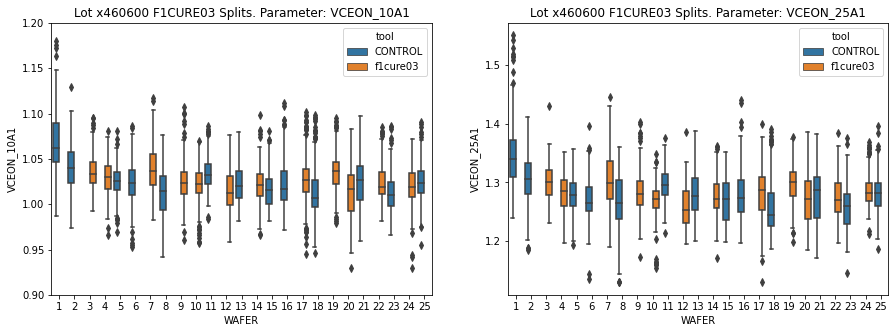

In [32]:
# Create figure

fig = plt.figure(figsize = (15, 5))


#SUBPLOT GRID

plt.subplot(1,2,1)

ax = sns.boxplot(x="WAFER", y= plot_param, data=df_vceon, hue = hue_mode)
ax.set_ylim([0.9, 1.2])

plt.title('Lot '+ lot + ' ' + reason + '. Parameter: ' + plot_param)



plt.subplot(1,2,2)

ax2 = sns.boxplot(x="WAFER", y= plot_param2, data=df_vceon, hue = hue_mode)
#ax2.set_ylim(ylim[1])

plt.title('Lot '+ lot + ' ' + reason + '. Parameter: ' + plot_param2)




plt.show()

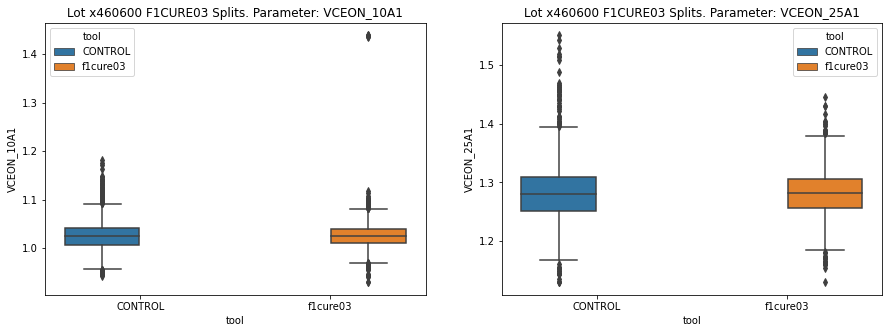

VCEON_10A1                    VCEON_25A1                    \
               mean       std quantile       mean       std   Range   
tool                                                                  
CONTROL    1.025935  0.027877   1.0239   1.281905  0.046502  0.4215   
f1cure03   1.026730  0.031753   1.0250   1.282271  0.037260  0.3155   

                                              
         Upper 95 quantile Lower 95 quantile  
tool                                          
CONTROL                NaN               NaN  
f1cure03               NaN               NaN

In [62]:
# Create figure

fig = plt.figure(figsize = (15, 5))

hue = None

#SUBPLOT GRID

plt.subplot(1,2,1)

ax = sns.boxplot(x="tool", y= plot_param, data=df_vceon, hue = hue_mode)
#ax.set_ylim([0.9, 1.2])

plt.title('Lot '+ lot + ' ' + reason + '. Parameter: ' + plot_param)



plt.subplot(1,2,2)

ax2 = sns.boxplot(x="tool", y= plot_param2, data=df_vceon, hue = hue_mode)
#ax2.set_ylim(ylim[1])

plt.title('Lot '+ lot + ' ' + reason + '. Parameter: ' + plot_param2)


plt.show()

